<a href="https://colab.research.google.com/github/Shyamsai456/Deep_learning_problems/blob/main/ClassificationUsingKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Keras library to build models for classificaiton problems.  used the popular MNIST dataset, a dataset of images, for a change.

The <strong>MNIST database</strong>, short for Modified National Institute of Standards and Technology database, is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.
    
The MNIST database contains 60,000 training images and 10,000 testing images of digits written by high school students and employees of the United States Census Bureau.



In [2]:
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

from tensorflowimport keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

In [3]:
import matplotlib.pyplot as plt

In [4]:
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

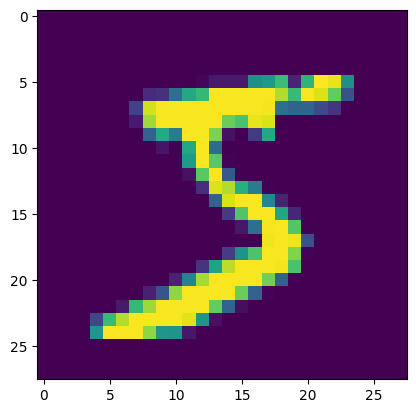

In [6]:
plt.imshow(X_train[0])

In [7]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images


In [12]:
num_pixels

784

In [8]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [9]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [10]:
# define classification model
def classification_model():
    # create model

    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))


    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9430 - loss: 0.1867 - val_accuracy: 0.9698 - val_loss: 0.1025
Epoch 2/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9754 - loss: 0.0785 - val_accuracy: 0.9757 - val_loss: 0.0758
Epoch 3/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9822 - loss: 0.0553 - val_accuracy: 0.9796 - val_loss: 0.0710
Epoch 4/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9869 - loss: 0.0402 - val_accuracy: 0.9772 - val_loss: 0.0791
Epoch 5/10
1875/1875 - 40s - 22ms/step - accuracy: 0.9895 - loss: 0.0316 - val_accuracy: 0.9784 - val_loss: 0.0719
Epoch 6/10
1875/1875 - 20s - 10ms/step - accuracy: 0.9919 - loss: 0.0263 - val_accuracy: 0.9820 - val_loss: 0.0700
Epoch 7/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9933 - loss: 0.0210 - val_accuracy: 0.9823 - val_loss: 0.0664
Epoch 8/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9935 - loss: 0.0194 - val_accuracy: 0.9813 - val_loss: 0.0750
Epoch 9/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9943 - loss: 0.0181 - val_a

In [13]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.9801999926567078% 
 Error: 0.019800007343292236


<h2>Code Explanation</h2>

<ol>
  <li>
    <strong>Importing Libraries</strong>
    <ul>
      <li><code>tensorflow</code> and <code>keras</code> are used for building and training deep learning models.</li>
      <li><code>matplotlib.pyplot</code> is used for displaying images.</li>
      <li><code>mnist</code> is a built-in dataset in Keras, containing 28x28 grayscale images of handwritten digits (0-9).</li>
    </ul>
  </li>

  <li>
    <strong>Loading the MNIST Dataset</strong>
    <ul>
      <li><code>mnist.load_data()</code> loads the training and test datasets (images and their corresponding labels).</li>
      <li>The dataset is split into <code>X_train</code> (images for training) and <code>y_train</code> (labels for training), and similarly for the test dataset (<code>X_test</code>, <code>y_test</code>).</li>
    </ul>
  </li>

  <li>
    <strong>Visualizing the First Image</strong>
    <ul>
      <li><code>plt.imshow(X_train[0])</code> is used to visualize the first image in the training dataset. The <code>imshow()</code> function displays the image as a grid of pixels.</li>
    </ul>
  </li>

  <li>
    <strong>Flattening the Images</strong>
    <ul>
      <li>Each image in the MNIST dataset is 28x28 pixels. We need to flatten it into a 1D vector with <code>28 * 28 = 784</code> features for each image. This is done with the <code>reshape()</code> function.</li>
      <li><code>X_train.reshape(X_train.shape[0], num_pixels)</code> flattens all images in the training set.</li>
      <li><code>astype('float32')</code> ensures that the image pixel values are in the appropriate data type for the model.</li>
    </ul>
  </li>

  <li>
    <strong>Normalizing Input Values</strong>
    <ul>
      <li>The pixel values are integers between 0 and 255, but we need to scale them to be between 0 and 1. This is done by dividing the pixel values by 255.</li>
      <li><code>X_train = X_train / 255</code> ensures that the input features are normalized, which helps improve the model's performance.</li>
    </ul>
  </li>

  <li>
    <strong>One-Hot Encoding the Labels</strong>
    <ul>
      <li>The output labels are integers between 0 and 9, but for a classification task, we need to represent them as one-hot encoded vectors (e.g., <code>[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]</code> for label 0).</li>
      <li><code>to_categorical()</code> is used to perform this transformation on the labels.</li>
    </ul>
  </li>

  <li>
    <strong>Defining the Classification Model</strong>
    <ul>
      <li>The model is defined as a <strong>Sequential</strong> model, where layers are stacked on top of each other.</li>
      <li><strong>Input Layer</strong>: The model expects inputs with a shape of <code>(num_pixels,)</code> (784 features in this case).</li>
      <li><strong>Dense Layers</strong>:
        <ul>
          <li>The first dense layer has <code>num_pixels</code> neurons and uses the <strong>ReLU</strong> activation function.</li>
          <li>The second dense layer has 100 neurons, again using <strong>ReLU</strong>.</li>
          <li>The output layer has <code>num_classes</code> neurons (one for each digit) and uses the <strong>Softmax</strong> activation to output probabilities.</li>
        </ul>
      </li>
      <li>The model is compiled with the <strong>Adam</strong> optimizer and <strong>categorical cross-entropy</strong> loss function, suitable for multi-class classification tasks.</li>
    </ul>
  </li>

  <li>
    <strong>Training the Model</strong>
    <ul>
      <li>The model is trained using <code>model.fit()</code>. This method takes in the training data (<code>X_train</code>, <code>y_train</code>), and the test data (<code>X_test</code>, <code>y_test</code>) is passed for validation.</li>
      <li>The model will run for 10 epochs (iterations over the entire dataset), and the <code>verbose=2</code> argument controls how much information is printed during training.</li>
    </ul>
  </li>

  <li>
    <strong>Evaluating the Model</strong>
    <ul>
      <li><code>model.evaluate()</code> is used to evaluate the trained model on the test data (<code>X_test</code>, <code>y_test</code>). It returns the loss and accuracy.</li>
      <li>The accuracy is printed as a percentage, and the error is calculated as <code>1 - accuracy</code>.</li>
    </ul>
  </li>
</ol>

<hr>

<h3>Output Example</h3>

<p>You should see something like this:</p>

<pre>
Accuracy: 98.32%
Error: 0.0168
</pre>

<p>This shows the model's accuracy on the test set and the error rate (1 minus the accuracy).</p>


<h3><strong>Saving the Model</strong><h3>

In [14]:
model.save('classification_model.keras')

<h3><strong>loading the Model</strong><h3>

In [17]:
#pretrained_model = keras.saving.load_model('classification_model.keras')
pretrained_model = keras.models.load_model('classification_model.keras')

<h3><strong>Testing the Model</strong><h3>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Class: 0
True Class: 0


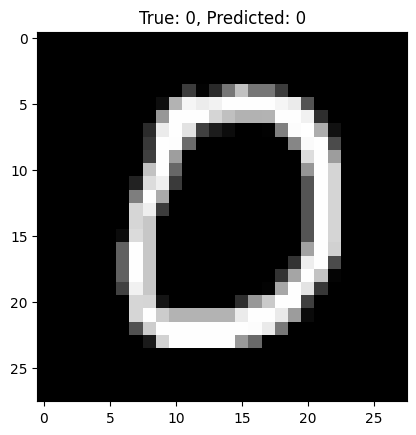

The prediction is correct!


In [20]:
import numpy as np

# Step 4: Select an index from the dataset (e.g., select the 0th item in the test set)
index = 10  # you can change this index to select any item from the dataset

# Step 5: Make a prediction for the selected item
predicted_class = np.argmax(model.predict(X_test[index:index+1]))  # Get the index of the predicted class
true_class = np.argmax(y_test[index])  # Get the true class label

# Step 6: Compare the prediction with the true label
print(f"Predicted Class: {predicted_class}")
print(f"True Class: {true_class}")

# Step 7: Display the image for reference
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title(f"True: {true_class}, Predicted: {predicted_class}")
plt.show()

# Step 8: Check if the prediction is correct
if predicted_class == true_class:
    print("The prediction is correct!")
else:
    print("The prediction is incorrect.")